# How to make a shift in the DataFrame?

Today we will figure out how to make a shift in the DataFrame. Using the Shift is very important in building predictive models. In ordinary live some factors precede the appearance of changes. Somebody didn't clean the tooth regularly and latter he had problems. Government improve system of welfare and after couple of months level of poverty decrease. In environment most of the factors are related with the time delay. Their apparent lack of mutual correlation is caused by the time delay.

At the beginning let's import necessary Python libraries.

In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math

Now we download data file. This is the simple time series, shows how is the cause and effect relationship between the rain and level of water in the river.

In [2]:
df = pd.read_excel('c:/7/river.xls')
df.set_index('DATE')
df.tail(5)

,DATE,Level of the rainfall,Level of the river
205,2019-11-22,0,207
206,2019-11-23,0,198
207,2019-11-24,0,198
208,2019-11-25,0,197
209,2019-11-26,0,197


In [3]:
df.columns

Index(['DATE', 'Level of the rainfall', 'Level of the river'], dtype='object')

Now we can ask: is it possible to predict the level of the river if we know the level of rainfall?
Everybody knows exist strong relationship between this two factors. 
Let's check what is the level of correlation between rainfall and level of river.

In [4]:
CORREL = df.corr()
CORREL

,Level of the rainfall,Level of the river
Level of the rainfall,1.000000,0.037281
Level of the river,0.037281,1.000000


There are no correlations between river and rain. Level of the river is the result of rain intensity. River reacts with time delay. We ought to make shift to meet the rainfall phenomena with the changing level of river.

To predict level water we will need to build regression equation. Unfortunately lack of linear relationship between variables enables such actions. How to make a shift in the DataFrame?

At first let's check what size of shift we will need to use. We make time plot of rain and river.

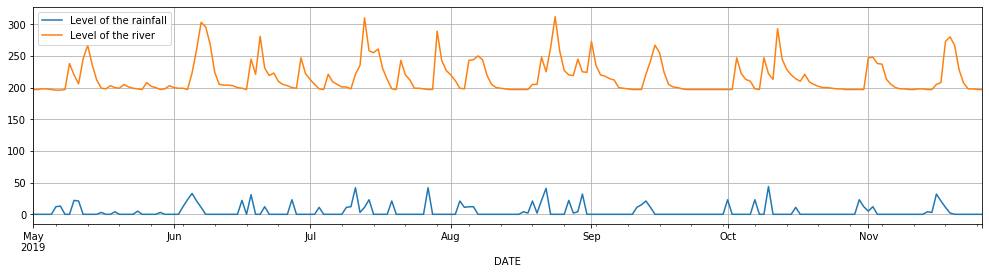

In [5]:
ewa = df.pivot_table(index=['DATE'], values=['Level of the rainfall','Level of the river'])
ewa.plot(figsize=(17,4), grid=True)

The graph is not legible. We add the column to improve legible of the plot.

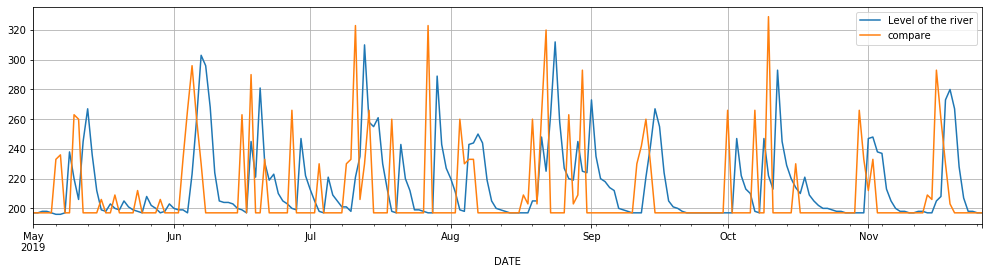

In [6]:
df['compare'] = (df['Level of the rainfall']*3)+197
foka = df.pivot_table(index=['DATE'], values=['compare','Level of the river'])
foka.plot(figsize=(17,4), grid=True)

Now we see clear the time delay between this two variables. It seems it is 2 days. Water have to flow from the fields and forests. Let's make this shift to adjust time series.

In [7]:
del df['compare']
df['Level of the rainfall']=df['Level of the rainfall'].shift(2, axis = 0)

We display rows 31 to 41.

In [8]:
df.iloc[32:42, :]

,DATE,Level of the rainfall,Level of the river
32,2019-06-02,0.0,199
33,2019-06-03,0.0,199
34,2019-06-04,0.0,197
35,2019-06-05,12.0,223
36,2019-06-06,23.0,260
37,2019-06-07,33.0,303
38,2019-06-08,21.0,296
39,2019-06-09,11.0,268
40,2019-06-10,0.0,224
41,2019-06-11,0.0,205


We make one factor regression equation. This time after shift we have strong correlation between variables. To make an equation we will need to improve the name of columns in data frame.

In [9]:
df.columns =['DATE','Level_of_th_rainfall', 'Level_of_the_river']
lm = smf.ols(formula = 'Level_of_the_river ~ Level_of_th_rainfall', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Level_of_the_river   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     570.9
Date:                Wed, 04 Sep 2019   Prob (F-statistic):           2.71e-61
Time:                        12:15:59   Log-Likelihood:                -829.87
No. Observations:                 208   AIC:                             1664.
Df Residuals:                     206   BIC:                             1670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              205.8021 

Text(0.5, 1.0, 'Linear Regression Plot')

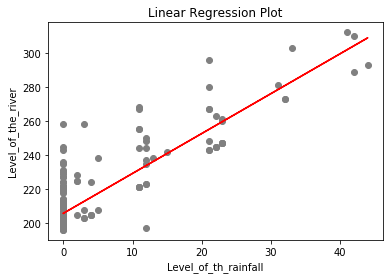

In [10]:
    plt.figure()
    plt.scatter(df.Level_of_th_rainfall, df.Level_of_the_river, c = 'grey')
    plt.plot(df.Level_of_th_rainfall, lm.params[0] + lm.params[1] * df.Level_of_th_rainfall, c = 'r')
    plt.xlabel('Level_of_th_rainfall')
    plt.ylabel('Level_of_the_river')
    plt.title("Linear Regression Plot")

This basic example exposes how important is shift. In real environment relationships between variables are not so pure and easy. We come across on host of variables where relationship will not be clear and easy. How to make a shift in the DataFrame. Shift should be adequate. How to calculate which is adequate?
I would like to show my method. I use this simple example with river and rain. I use loop to search the best shift.

In [11]:
  df['Level_of_th_rainfall']=df['Level_of_th_rainfall'].shift(-2, axis = 0)

In [12]:
for a in range(7):
    df['Level_of_th_rainfall']=df['Level_of_th_rainfall'].shift(a, axis = 0)
    lm = smf.ols(formula = 'Level_of_the_river ~ Level_of_th_rainfall', data = df).fit()
    print('Shift:', a, '   R2:', lm.rsquared)
    print('----------------------------------------------')
    df['Level_of_th_rainfall']=df['Level_of_th_rainfall'].shift(-a, axis = 0)

Shift: 0    R2: 0.0011493531130295498
----------------------------------------------
Shift: 1    R2: 0.02987915390901097
----------------------------------------------
Shift: 2    R2: 0.7348356542412179
----------------------------------------------
Shift: 3    R2: 0.32047334629435476
----------------------------------------------
Shift: 4    R2: 0.128378081749438
----------------------------------------------
Shift: 5    R2: 0.04105643256940372
----------------------------------------------
Shift: 6    R2: 0.0009657734576321575
----------------------------------------------


Most commonly used indicator of quality of regression model are ratio: R-squared. In the shift 2 we noticed the best level of this indicator.

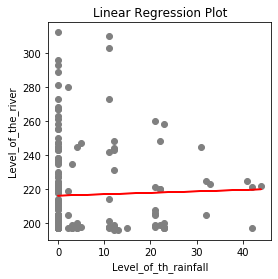

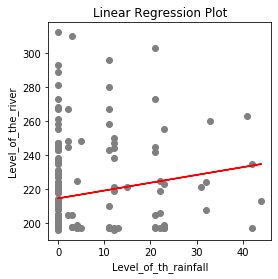

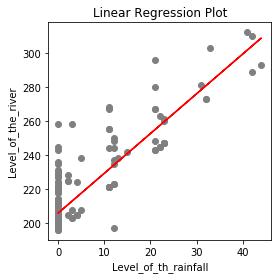

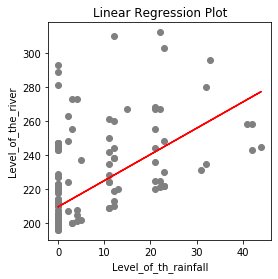

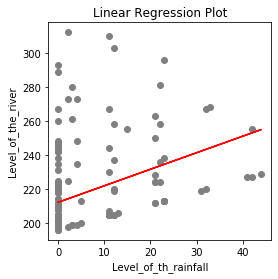

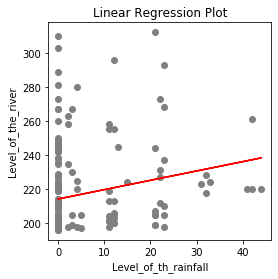

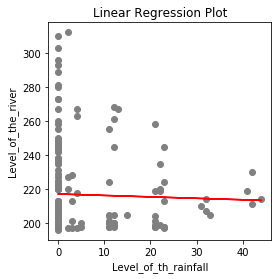

In [13]:
for a in range(7):
    df['Level_of_th_rainfall']=df['Level_of_th_rainfall'].shift(a, axis = 0)
    lm = smf.ols(formula = 'Level_of_the_river ~ Level_of_th_rainfall', data = df).fit()
    plt.figure(figsize=(4,4))
    plt.scatter(df.Level_of_th_rainfall, df.Level_of_the_river, c = 'grey')
    plt.plot(df.Level_of_th_rainfall, lm.params[0] + lm.params[1] * df.Level_of_th_rainfall, c = 'r')
    plt.xlabel('Level_of_th_rainfall')
    plt.ylabel('Level_of_the_river')
    plt.title('Linear Regression Plot')
    df['Level_of_th_rainfall']=df['Level_of_th_rainfall'].shift(-a, axis = 0)